In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, recall_score, precision_score
import pickle
from utility import *
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
from collections import defaultdict
from sklearn.model_selection import validation_curve
import operator


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
xtrain = pLoad("xtrain")
xtrain2 = pLoad("xtrain2")
xtrain_noelem = pLoad("xtrain_noelem")
xtrain_noelem2 = pLoad("xtrain_noelem2")
ytrain = pLoad("ytrain")
xtest = pLoad("xtest")
xtest2 = pLoad("xtest2")
ytest = pLoad("ytest")


trivtrain = pLoad("trivialtrain")
trivval = pLoad("trivialval")
ntrivtrain = pLoad("nontrivialtrain")
ntrivval = pLoad("nontrivialval")

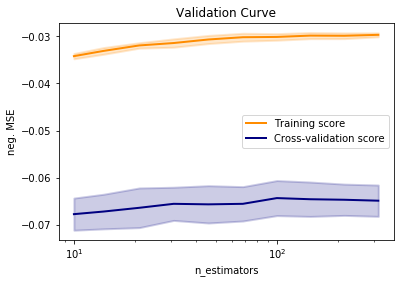

In [143]:
param_range = np.logspace(1, 2.5, 10).astype(int)

rf1 = RandomForestClassifier(n_jobs=-1, random_state=0, max_features = 30, min_samples_leaf = 3)
xin = xtrain2
yin = ytrain
model = rf1

param_name = "n_estimators"

cvresults1 = {}
cvresults1 = crossValidate(model, xin, yin,
                            param_name, param_range)
plt.show()

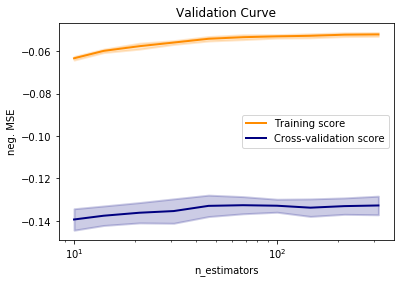

In [146]:
param_range = np.logspace(1, 2.5, 10).astype(int)

rf1 = RandomForestClassifier(n_jobs=-1, random_state=0, max_features = 30, min_samples_leaf = 3)
xin = xtrain2.iloc[ntrivtrain]
yin = ytrain[ntrivtrain]
model = rf1

param_name = "n_estimators"

cvresults2 = {}
cvresults2 = crossValidate(model, xin, yin,
                            param_name, param_range)
plt.show()

35 trees are adequate based on CV

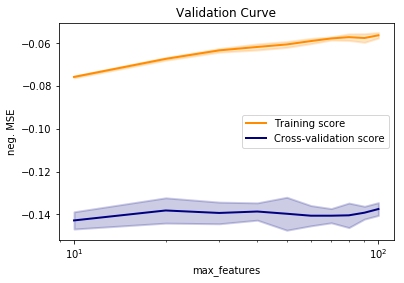

In [147]:
param_range = np.linspace(10,100,10).astype(int)

rf3 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=35, min_samples_leaf = 3)
xin = xtrain2.iloc[ntrivtrain]
yin = ytrain[ntrivtrain]
model = rf1

param_name = "max_features"


cvresults3 = {}
cvresults3 = crossValidate(model, xin, yin,
                            param_name, param_range)
plt.show()

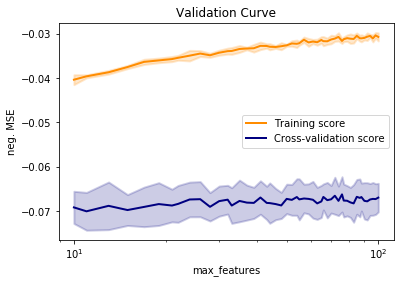

In [149]:
param_range = np.linspace(10,100,).astype(int)

rf3 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=35, min_samples_leaf = 3)
xin = xtrain2
yin = ytrain
model = rf1

param_name = "max_features"

cvresults3 = {}
cvresults3 = crossValidate(model, xin, yin,
                            param_name, param_range)
plt.show()

30 features are adequate based on CV


## Performing feature selection

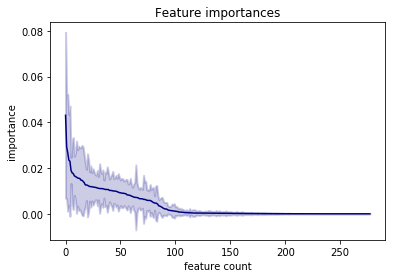

In [15]:
forest = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=35, max_features = 30, min_samples_leaf=3)
forest.fit(xtrain2, ytrain[:,1:10])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


# Plot the feature importances of the forest
lw = 2
plt.figure()
plt.title("Feature importances")
plt.plot(range(xtrain2.shape[1]), importances[indices], color = "navy")
plt.fill_between(range(xtrain2.shape[1]), importances[indices] - std[indices],
                 importances[indices] + std[indices], alpha=0.2,
                 color="navy", lw=lw)
plt.xlabel("feature count")
plt.ylabel("importance")
plt.show()

In [16]:
columns = xtrain2.columns
importancewithnames = [(columns[i], importances[i]) for i in range(xtrain2.shape[1])]
importancewithnames.sort(key = operator.itemgetter(1))
importancewithnames = importancewithnames[::-1]
top100 = [i[0] for i in importancewithnames[:100]]

1
1
1
2
2
3
4
5
6
8
11
14
18
23
29
37
48
61
78
100


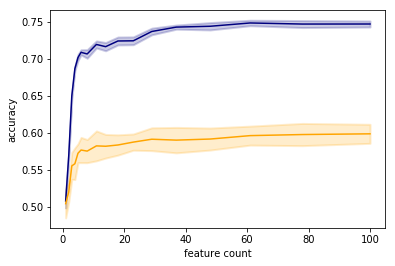

In [155]:
from sklearn.metrics import accuracy_score
param_range = np.logspace(0, 2, 20).astype(int)

train = np.zeros(len(param_range))
trainsd = np.zeros(len(param_range))
val = np.zeros(len(param_range))
valsd =np.zeros(len(param_range))

rf3 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators="sqrt", min_samples_leaf = 3)
xin = xtrain2[top100]
yin = ytrain[:,1:10]
model = rf1

kf = KFold(n_splits=5)
kf.get_n_splits(xin)


for idx, i in enumerate(param_range):
    print(i)
    xtofit = xin[top100[:i]]
    currtrain = []
    currval = []
    for train_index, test_index in kf.split(xin):
        f3 = RandomForestClassifier(n_jobs=2, n_estimators=30, random_state=0, max_features="sqrt", min_samples_leaf = 3)
        
        f3.fit(xtofit.iloc[train_index],yin[train_index])
        currtrain += [accuracy_score(f3.predict(xtofit.iloc[train_index]),yin[train_index])]
        currval += [accuracy_score(f3.predict(xtofit.iloc[test_index]),yin[test_index])]
    trainsd[idx] = np.std(currtrain)
    valsd[idx] = np.std(currval)
    train[idx] = np.mean(currtrain)
    val[idx] = np.mean(currval)
    
plt.plot(param_range,train, color = "navy")
plt.fill_between(param_range,train - trainsd,
                 train + trainsd, alpha=0.2,
                 color="navy", lw=lw)


plt.plot(param_range,val, color = "orange")
plt.fill_between(param_range,val - valsd,
                 val + valsd, alpha=0.2,
                 color="orange", lw=lw)


plt.xlabel("feature count")
plt.ylabel("accuracy")
plt.show()

Based on CV ~25 features is adequate

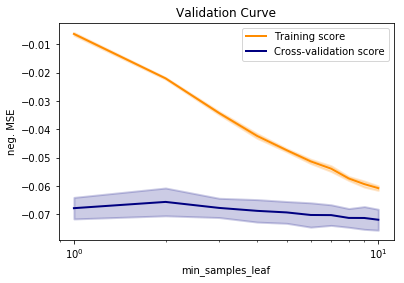

In [157]:
param_range = np.linspace(1,10,10).astype(int)

rf3 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators="sqrt", max_features = 30)
xin = xtrain2
yin = ytrain
model = rf1

param_name = "min_samples_leaf"

cvresults3 = {}
cvresults3 = crossValidate(model, xin, yin,
                            param_name, param_range)
plt.show()

Min leaf size reduces the amount of overfitting but has little effect on train accuracy

## Evaluating model performance

In [17]:
rfmodel = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=30, 
                             max_features = "sqrt", min_samples_leaf=3)
rfmodel.fit(xtrain2[top100[:25]], ytrain[:,1:10])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
mean_squared_error(rfmodel.predict(xtest2[top100[:25]]),ytest[:,1:10])

0.0766655868696685

In [40]:
testpreds = rfmodel.predict(xtest2[top100[:25]])
trainpreds = rfmodel.predict(xtrain2[top100[:25]])
print("MSE train",mean_squared_error(trainpreds, ytrain[:,1:10]))
print("MSE test",mean_squared_error(testpreds, ytest[:,1:10]))
print("precission test",precision_score(testpreds.flatten(), ytest[:,1:10].flatten()))
print("recall test",recall_score(testpreds.flatten(), ytest[:,1:10].flatten()))
rfdict = {"random forest":[mean_squared_error(trainpreds, ytrain[:,1:10]),
                           mean_squared_error(testpreds, ytest[:,1:10]),
                       precision_score(testpreds.flatten(), ytest[:,1:10].flatten()),
                       recall_score(testpreds.flatten(), ytest[:,1:10].flatten())]
                                                                                    }
pSave(rfdict,"randomforest")

MSE train 0.039449169704333736
MSE test 0.0766655868696685
precission test 0.4493927125506073
recall test 0.7278688524590164


## Predicting the test set

In [19]:
testset = pLoad("test_noelem2")

In [23]:
testpred = rfmodel.predict(testset[top100[:25]])

In [28]:
vectors = buildStabilityVectors(testpred)

In [32]:
vectorframe = pd.DataFrame(vectors)
vectorframe.to_csv("rfvectors.txt", sep='\t')